## Assigment : Simple and Multiple Linear Regression

# 1- Simple Linear Regression
- Simple linear regression is a regression model that estimates the relationship between 
  - One independent variable and 
  - One dependent variable using a straight line.
  - Linear regression finds the line of best fit line through your data by searching for the regression coefficient (B1)
  - Minimizes the total error (e) of the model 

![QR](QR.png)

OR

![](sl.png)
````
 Alpha  or slope-intercept or y-intercept form is, 
 
 y=mx+b
 
 Slop = Y2-Y1/X2-X1
````
**Use**

Linear regression analysis is used to predict the value of a variable based on the value of another variable.


#### Import Libraries
#### Pandas 
- Mainly used for data analysis and associated manipulation of tabular data in DataFrames.

In [1]:
import pandas as pd

Load dataset using pandas read_csv funtion.

### About Dataset
Dataset was downloaded from **kaggle** https://www.kaggle.com/datasets/codebreaker619/salary-data-with-age-and-experience?resource=download, consists of three columns names Years Experience, Age,Salary & Bonus(20% of Salary). Basically, Salary is Dependent variable on Experience and Age. So now we are going to read_csv file using pandas read_csv function.

In [117]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Age,Salary,Bonus
0,1.1,21.0,39343,7868.6
1,1.3,21.5,46205,9241.0
2,1.5,21.7,37731,7546.2
3,2.0,22.0,43525,8705.0
4,2.2,22.2,39891,7978.2


### Data Wrangling/Data Cleaning
As simple linear regression based on two variables one is dependent and other is Independent. so we'll drop age column from our dataset, and named as **df_clean**. Also we are checking our dataset for null values, as this dataset don't have null values so we don't need to delete or manage any missing data.

In [118]:
df_clean = df.drop(['Age','Bonus'],axis=1)
df_clean.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [119]:
# Checking for null values
df_clean.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Splitting Dataset 
We'll split our data set into trainig data and testing data. For this purpose we tool YearsExperience as X, and Salary on y.

In [120]:
X = df_clean[['YearsExperience']]
y = df_clean['Salary']

In [97]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [98]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

- Here, we're Importinig **train_test_split** model from **sklearn libraries model selection**.
- And splitting our dataset into test and train with total **80:20**, and put random_state = 0 to allow our model to randomly split dataset.
- After running below code model will split **80%** of our data set into training data and **20%** into test data(for both X and y).

In [99]:
# Import library 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


### Fit Linear Regression Model
Once we split our dataset. Next step is to fit Linear Regression model on our training data. For this purpose 
- we **import LinearRegression** from **Sklearn's linear_model**. and using fit function we fit our X_train & y_train data on linear regression model.

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train,y_train)

In [109]:
# After Fitting Linear Regression Model
model

LinearRegression()

### Plotting 
- To plot linear regression > We've Imported matplotlib library.
- Now, Ploted Scatter plot on training dataset.


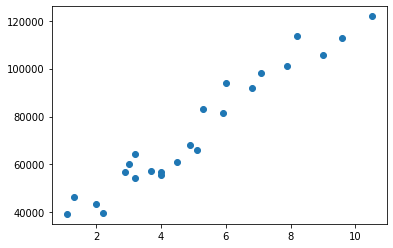

In [110]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)


- Here, we've ploted regression line on our training data set using **predict function** on our model, we've created in earlier steps.

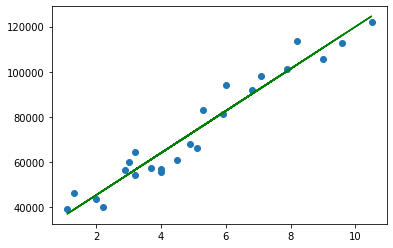

In [111]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color = 'green')
plt.show()

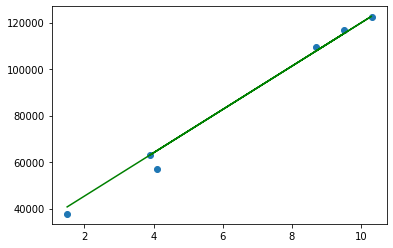

In [103]:
plt.scatter(X_test,y_test)
plt.plot(X_test,model.predict(X_test),color = 'green')
plt.show()

### Testing or Evaluating Your Model
Sometimes, regression line is not enough to show our data accuracy, so we move towards some quantitative data.
- For this purpose we apply **score function** on our model and pass test and training data separately.
- There is very small difference between Test and Training data scores.

In [115]:
# Model Fitness
print('Score for Test Data =',model.score(X_test,y_test))
print('Score for Training Data =',model.score(X_train,y_train))
print('Difference = ',(model.score(X_test,y_test))-(model.score(X_train,y_train)))


Score for Test Data = 0.988169515729126
Score for Training Data = 0.9411949620562126
Difference =  0.04697455367291348


### Prediction of Unknown Values
Although, we've done with Linear regression but now we're predicting salary on unknown Experience Years.
- By **Using Predict function on our model.**

In [105]:
model.predict([[10]])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([119905.85041792])

In [106]:
model.predict(X_test)

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [107]:
model.predict([[5],[10],[15]])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 73342.97478427, 119905.85041792, 166468.72605157])

In [108]:
x= ([10],[25],[35],[6],[7])
model.predict(x)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([119905.85041792, 259594.47731886, 352720.22858615,  82655.549911  ,
        91968.12503773])

### Multiple Linear Regression
Multiple linear regression is a regression model 
- that estimates the relationship between a quantitative dependent variable and 
- two or more independent variables using a straight line.

![](mlr.png)
- yi​ is the dependent or predicted variable
- β0 is the y-intercept, i.e., the value of y when both xi and x2 are 0.
- β1 and β2 are the regression coefficients representing the change in y relative to a one-unit change in xi1 and xi2,        respectively.
- βp is the slope coefficient for each independent variable
- ϵ is the model’s random error (residual) term.

In [121]:
df.head()

,YearsExperience,Age,Salary,Bonus
0,1.1,21.0,39343,7868.6
1,1.3,21.5,46205,9241.0
2,1.5,21.7,37731,7546.2
3,2.0,22.0,43525,8705.0
4,2.2,22.2,39891,7978.2


In [122]:
# checking for null data.
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
Bonus              0
dtype: int64

In [123]:
X = df[['YearsExperience','Age','Salary']]
y = df['Bonus']

In [124]:
X.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [125]:
y.head()

0    7868.6
1    9241.0
2    7546.2
3    8705.0
4    7978.2
Name: Bonus, dtype: float64

In [126]:
df.dtypes

YearsExperience    float64
Age                float64
Salary               int64
Bonus              float64
dtype: object

In [127]:
# create & fit your model
model = LinearRegression().fit(X,y)
model

LinearRegression()

In [128]:
model.coef_

array([2.30765818e-13, 4.56079619e-13, 2.00000000e-01])

In [129]:
model.intercept_

-7.275957614183426e-12

In [130]:
model.predict([[1.1,21.0,39343]])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7868.6])

In [131]:
# import library and split data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/5,random_state=0)

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model=model.fit(X_train,y_train)
model

LinearRegression()

In [133]:
print('Score for Training data ',model.score(X_train,y_train))
print('Score for Testing data',model.score(X_test,y_test))

Score for Training data  1.0
Score for Testing data 1.0


In [141]:
model.predict([[2.2,25.0,59453]])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11890.6])

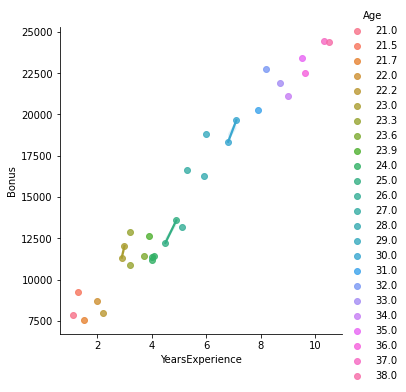

In [154]:
import seaborn as sns
sns.lmplot(x='YearsExperience',y='Bonus',data=df, hue='Age')